Link Tham Khảo

```
#https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-clustering-dbscan
```



Thêm các Thư Viện Cần Thiết

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn

%matplotlib inline

Gọi Data Hoa Iris với 3 loại hoa khác nhau.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X, Y = iris.data[:, [2,3]], iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


Dưới đây, ta vẽ tập dữ liệu dưới dạng biểu đồ phân tán mô tả mối quan hệ giữa chiều dài lá đài so với chiều rộng lá đài giữa mỗi mẫu dữ liệu,các điểm được mã hóa màu theo danh mục hoa.

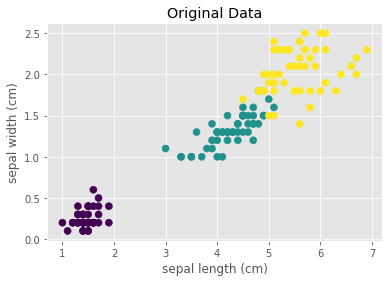

In [ ]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Original Data");

hàm có thể được sử dụng để so sánh các nhãn hình ảnh gốc và các nhãn được dự đoán bởi DBSCAN dùng để lập biểu đồ dữ liệu gốc được mã hóa màu theo nhãn cụm ban đầu và dữ liệu gốc được mã hóa màu theo nhãn cụm dự đoán (DBSCAN).

In [ ]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Clustering Algorithm Prediction");

Đào tạo mô hình DBSCAN với các tham số là các giá trị của tập hoa Iris

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

Y_preds = db.fit_predict(X)

Y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Vẽ kết quả phân cụm

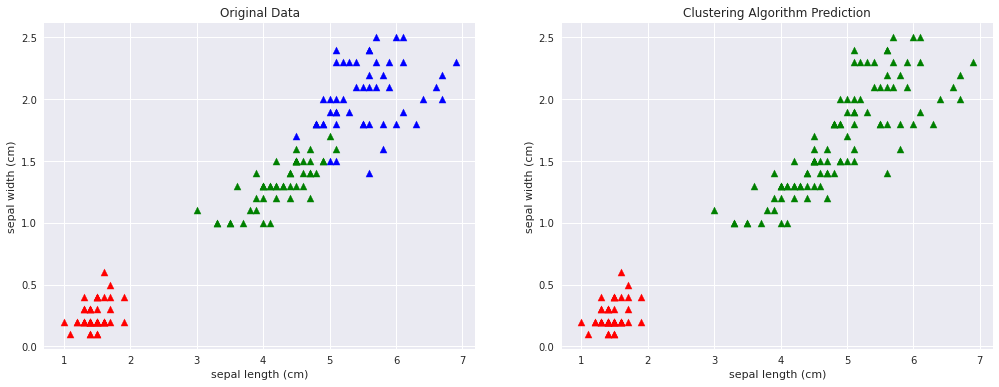

In [ ]:
plot_actual_prediction_iris(X, Y, Y_preds)

Đánh giá hiệu suất của DBSCAN
 sử dụng phương pháp Adjust_rand_score để đo lường hiệu suất của thuật toán phân cụm bằng cách đưa ra các nhãn gốc và nhãn dự đoán làm đầu vào cho phương pháp.

In [ ]:
#tính toán phân theo cụm từ -1 tới 1 nếu có giá trị ngẫu nhiên thì trả về 0
#nếu giá trị 1 thì có nghĩa thuật toán đã dự đoán chính xác 
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(Y, Y_preds)

0.5681159420289855

In [ ]:
db = DBSCAN(eps=0.2, min_samples=8, )

Y_preds = db.fit_predict(X)

Y_preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  2,  1, -1,  1,  1,  1,  1,  2,  1, -1,  1, -1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  2,
       -1, -1, -1, -1,  1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1,  2, -1,  2, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1,  2, -1, -1, -1,  2,  2, -1,  2])

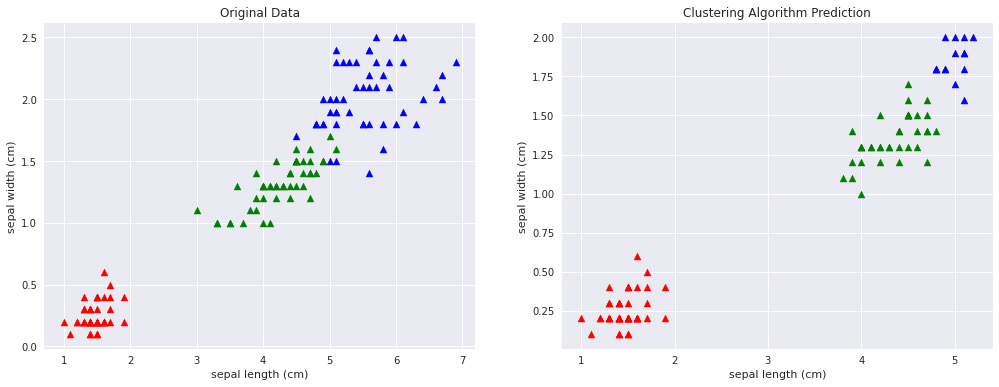

In [ ]:
#sau đó ta lại vẽ kết quả phân cụm
plot_actual_prediction_iris(X, Y, Y_preds)

In [ ]:
#dự đoán hiệu suất của DBSCAN
adjusted_rand_score(Y, Y_preds)

0.69478148725419

In [ ]:
print("Size of Core Samples : ", db.core_sample_indices_.shape)

db.core_sample_indices_[:5]

Size of Core Samples :  (75,)


array([0, 1, 2, 3, 4])

In [ ]:
print("Size of Components : ", db.components_.shape)

Size of Components :  (75, 2)


Tạo tập dữ liệu Moons (Hai vòng tròn xen kẽ)

Dataset Size :  (400, 2) (400,)


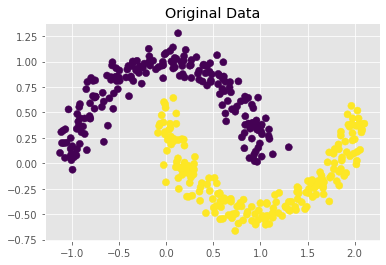

In [ ]:
X, Y = datasets.make_moons(n_samples=400,
                  noise=0.09,
                  random_state=1)
print('Dataset Size : ',X.shape, Y.shape)

with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.title("Original Data");

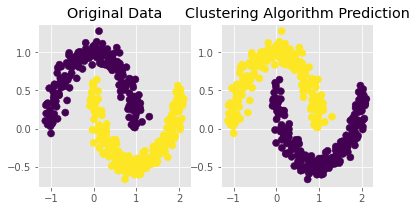

In [ ]:
def plot_actual_prediction(X,Y,Y_preds):
    with plt.style.context("ggplot"):
        plt.figure(figsize=(6,3))

        plt.subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[:,0],X[:,1], c = Y_preds , marker="o", s=50)

        plt.title("Clustering Algorithm Prediction");

db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
Y_preds = db.fit_predict(X)

plot_actual_prediction(X, Y, Y_preds)

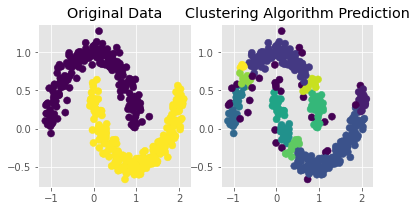

In [ ]:
db = DBSCAN(eps=0.1,
            min_samples=5,
            metric='euclidean')
Y_preds = db.fit_predict(X)

plot_actual_prediction(X, Y, Y_preds)

Tạo tập dữ liệu của các vòng kết nối (Vòng tròn lớn chứa một vòng tròn nhỏ hơn)

Dataset Size :  (300, 2) (300,)


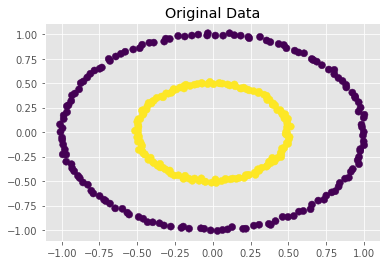

In [ ]:
X, Y  = datasets.make_circles(n_samples=300, noise=0.01,factor=0.5)
print('Dataset Size : ',X.shape, Y.shape)

with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.title("Original Data");

Tạo tập dữ liệu Isotropic Gaussian Blobs & Skew Blobs bằng cách sử dụng phương pháp chuyển đổi

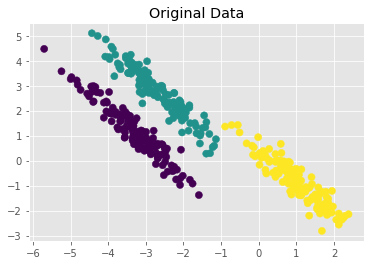

In [ ]:
random_state = 170
X, Y = datasets.make_blobs(n_samples=400, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.title("Original Data");